In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('Data.csv')

# Display the first few rows of the dataset
print(df.head())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [6]:
# ---------------- Data Cleaning & Preprocessing ----------------

# Check for missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# If there are missing values, handle them (e.g., fill with median or mean)
df.fillna(df.median(), inplace=True)  # Filling missing values with median for numerical columns

# Check for duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)  # Drop duplicates if any

# Summary statistics
print("\nSummary Statistics:\n", df.describe())




Missing Values in Each Column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Number of Duplicate Rows: 1

Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000   

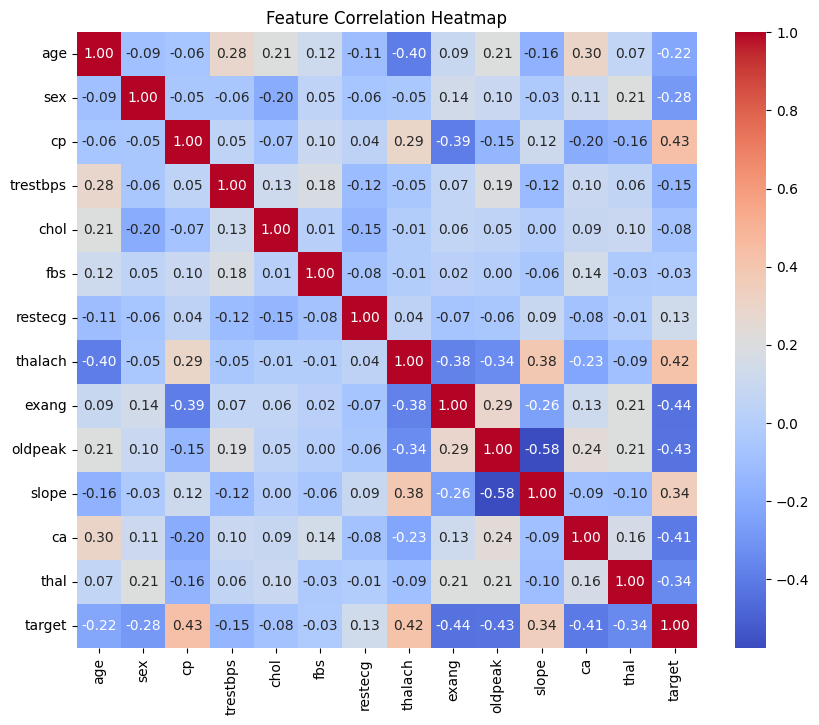

<ipython-input-7-67995d377977>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


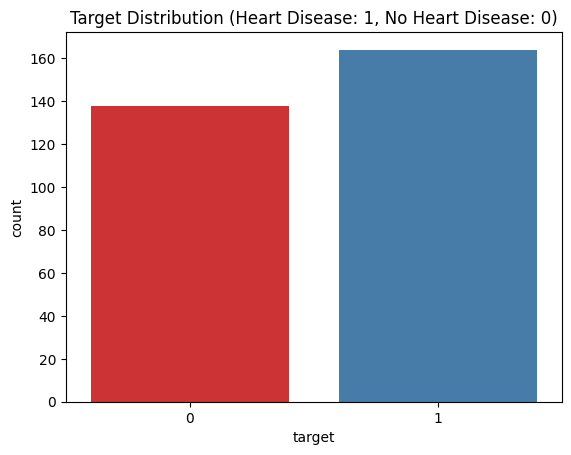

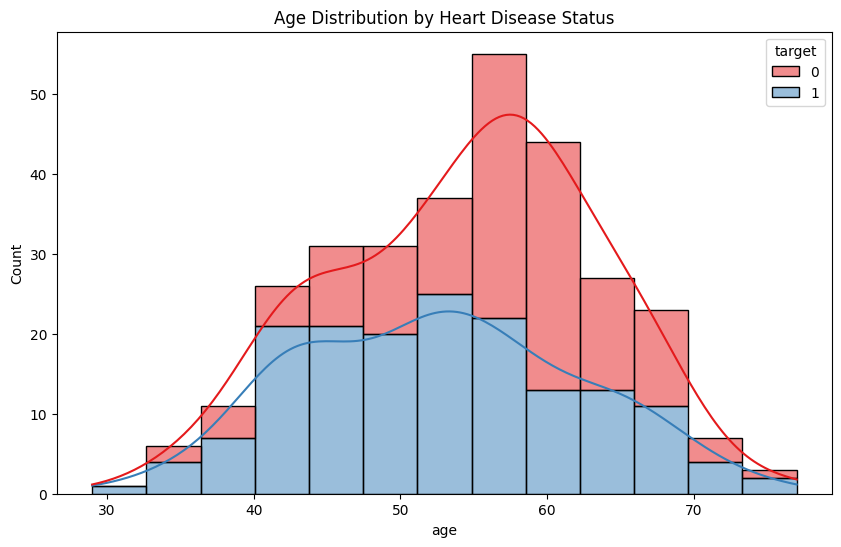

In [7]:
# ---------------- Data Visualization ----------------

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Visualizing target distribution
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Target Distribution (Heart Disease: 1, No Heart Disease: 0)')
plt.show()

# Visualizing age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True, palette='Set1')
plt.title('Age Distribution by Heart Disease Status')
plt.show()



In [8]:
# ---------------- Feature Engineering & Scaling ----------------

# Feature Columns and Target
X = df.drop(columns=['target'])  # Dropping target column from features
y = df['target']  # Target column (1 = disease, 0 = no disease)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# ---------------- Hybrid ML Model (Stacking) ----------------

# Define base models for the stacking classifier
logistic_clf = LogisticRegression(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
gradient_boosting_clf = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', logistic_clf),
        ('rf', random_forest_clf),
        ('gb', gradient_boosting_clf)
    ],
    final_estimator=LogisticRegression(),  # Meta-classifier
    cv=5  # 5-fold cross-validation
)

# Train the hybrid model
stacking_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_clf.predict(X_test)
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# ---------------- Model Evaluation ----------------

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.8689
Precision: 0.9000
Recall: 0.8438
ROC AUC Score: 0.9353

Confusion Matrix:
[[26  3]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



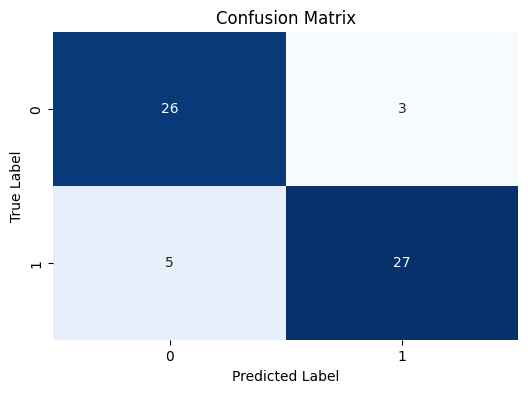

In [10]:
# ---------------- Confusion Matrix Plot ----------------
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()